In [1]:
from codes.network import create_connections

In [94]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
#graph=nx.DiGraph()
#G = create_connections(graph=graph, level_f='./')

In [5]:
graph_all = nx.DiGraph()
G_all = create_connections(graph=graph_all, level_f='./', label='all')

In [6]:
graph_friend = nx.DiGraph()
G_friend = create_connections(graph=graph_friend, level_f='./', label='friend')

In [7]:
graph_gen = nx.DiGraph()
G_gen = create_connections(graph=graph_gen, level_f='./', label='gen')

In [8]:
# graph5 = nx.DiGraph()

# formula_s = '{ \
#     "DI_Com_Network": 1, \
#     "DI_Impression_management": 0, \
#     "DI_Modelling": 0, \
#     "GEN_Advice": 0.5, \
#     "GEN_Friendship": 1, \
#     "GEN_Leader": 1, \
#     "GEN_Respect": 1, \
#     "GEN_Social_Facilitation": 1, \
#     "GEN_Want2B": 1, \
#     "ME_Com_Network": 0, \
#     "PA_Com_Network": 1, \
#     "PA_Impression_Management": 0, \
#     "PA_Modelling": 0.3 }'
# G5 = create_connections(graph=graph5, level_f='./', label='customized', formula_s=formula_s)

# Measurements for the graphs

### Degree distribution histogram

Text(0.5,0,'Degree')

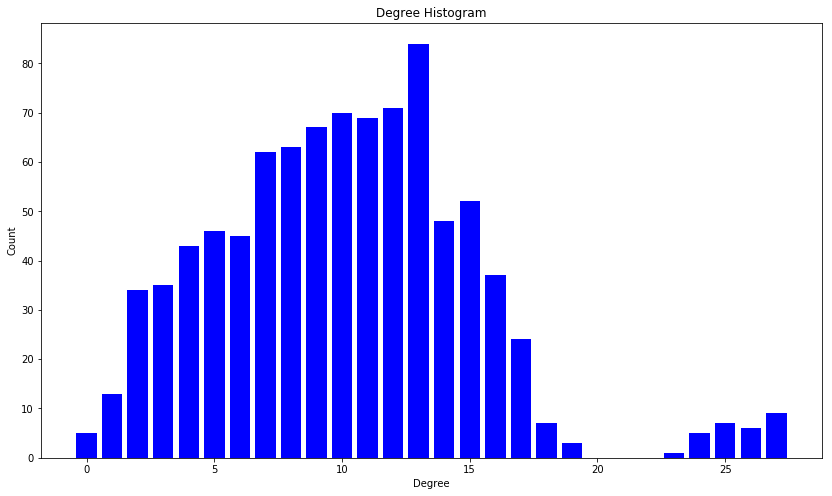

In [18]:
degree_sequence_all = sorted([d for n, d in G_all.out_degree()], reverse=True)  # degree sequence
degree_sequence_friend = sorted([d for n, d in G_friend.out_degree()], reverse=True)  # degree sequence
degree_sequence_gen = sorted([d for n, d in G_gen.out_degree()], reverse=True)  # degree sequence

degreeCount_all = collections.Counter(degree_sequence_all)
degreeCount_friend = collections.Counter(degree_sequence_friend)
degreeCount_gen = collections.Counter(degree_sequence_gen)

deg_all, cnt_all = zip(*degreeCount_all.items())
deg_friend, cnt_friend = zip(*degreeCount_friend.items())
deg_gen, cnt_gen = zip(*degreeCount_gen.items())

fig, ax = plt.subplots(figsize=((14,8)))

plt.bar(list(deg_all), cnt_all, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)


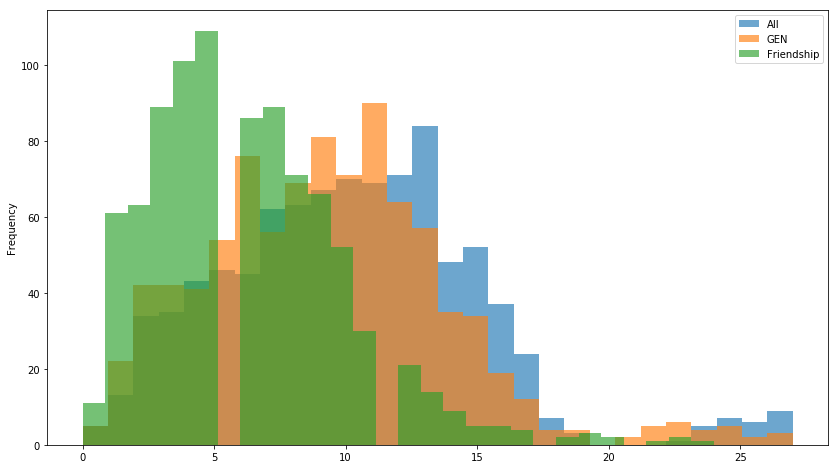

In [78]:
#pd.Series(dict(degreeCount_all))#.hist(bins=28)

plt.figure(figsize=(14,8))

pd.Series(degree_sequence_all).plot(kind='hist', bins=28, alpha=0.65, label='All')#, rwidth=0.5)
pd.Series(degree_sequence_gen).plot(kind='hist', bins=28, alpha=0.65, label='GEN')#, rwidth=0.5)
pd.Series(degree_sequence_friend).plot(kind='hist', bins=28, alpha=0.65, label='Friendship')#, rwidth=0.5)
#pd.Series(degree_sequence_gen)#.hist(bins=28, )#, rwidth=0.5)
#pd.Series(degree_sequence_friend)#.hist(bins=28)#, rwidth=0.5)
plt.legend()
#df4.plot(kind='hist', alpha=0.5)


#df_merge.hist(bins=28)#, rwidth=0.5)

In [95]:
dist_all, _ = np.histogram(degree_sequence_all, bins=np.arange(28))
dist_gen, _ = np.histogram(degree_sequence_gen, bins=np.arange(28))
dist_friend, _ = np.histogram(degree_sequence_friend, bins=np.arange(28))

In [102]:
stats.pearsonr(dist_all, dist_gen)

(0.9093651883879896, 5.174665028663992e-11)

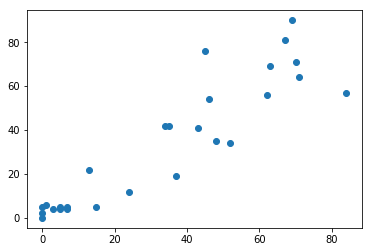

In [104]:
plt.scatter(dist_all, dist_gen)

In [105]:
stats.pearsonr(dist_all, dist_friend)

(0.4835972290599817, 0.010600594550178248)

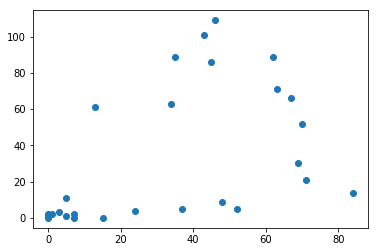

In [106]:
plt.scatter(dist_all, dist_friend)

In [107]:
stats.pearsonr(dist_friend, dist_gen)

(0.6535356425253106, 0.0002186439715775998)

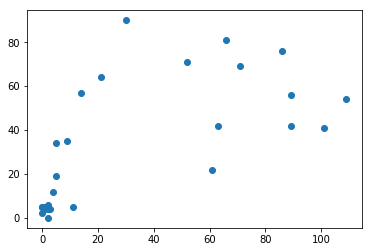

In [109]:
plt.scatter(dist_friend, dist_gen)